In [3]:
#セイバー指標をテーブルに加えようのコーナー

In [4]:
import pandas as pd
df_batting_origin = pd.read_csv("Batting.csv")
print(df_batting_origin.columns)

'''
'playerID'
'yearID' 
'stint' 1シーズンで何チーム目か
'teamID' チーム(略称)
'lgID' リーグ
'G' 出場数
'AB' 打数
'R' 得点
'H' 安打数
'2B' 二塁打
'3B' 三塁打
'HR' ホームラン
'RBI' 打点
'SB' 盗塁
'CS' 盗塁死
'BB' 四球
'SO' 三振
'IBB' 敬遠
'HBP' 死球
'SH' 犠打
'SF' 犠飛
'GIDP' 併殺打
       
'''
#playerID    104324 non-null object
#yearID      104324 non-null int64
#stint       104324 non-null int64　1シーズンで何チーム目か
#teamID      104324 non-null object　チーム(略称)
#lgID        103586 non-null object　リーグ
#G           104324 non-null int64　出場数
#AB          104324 non-null int64　打数
#R           104324 non-null int64　得点
#H           104324 non-null int64　安打数
#2B          104324 non-null int64　二塁打数
#3B          104324 non-null int64　三塁打数
#HR          104324 non-null int64　ホームラン数
#RBI         103568 non-null float64　打点
#SB          101956 non-null float64　盗塁数
#CS          80832 non-null float64　盗塁死数
#BB          104324 non-null int64　死球数
#SO          97974 non-null float64　三振数
#IBB         67722 non-null float64　敬遠数
#HBP         101507 non-null float64　死球数
#SH          98255 non-null float64　犠打数
#SF          68259 non-null float64　犠飛数
#GIDP        78921 non-null float64　併殺打数

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')


"\n'playerID'\n'yearID' \n'stint' 1シーズンで何チーム目か\n'teamID' チーム(略称)\n'lgID' リーグ\n'G' 出場数\n'AB' 打数\n'R' 得点\n'H' 安打数\n'2B' 二塁打\n'3B' 三塁打\n'HR' ホームラン\n'RBI' 打点\n'SB' 盗塁\n'CS' 盗塁死\n'BB' 四球\n'SO' 三振\n'IBB' 敬遠\n'HBP' 死球\n'SH' 犠打\n'SF' 犠飛\n'GIDP' 併殺打\n       \n"

In [5]:
import pandas as pd
import sklearn

df_batting_origin = pd.read_csv("Batting.csv")
df_batting = df_batting_origin.copy()
df_batting = df_batting.fillna(int(0)) #欠損を0に置き換え
df_batting['AVG'] = df_batting['H']/df_batting['AB']
#出塁率 ＝ （安打数＋四球＋死球）÷（打数＋四球＋死球＋犠飛）
df_batting['OBP'] = (df_batting['H'] + df_batting['BB'] + df_batting['HBP']) / (df_batting['AB'] + df_batting['BB'] + df_batting['HBP'] + df_batting['SF'])
#塁打数
df_batting['TB'] = (df_batting['H'] - df_batting['2B'] - df_batting['3B'] - df_batting['HR']) * 1 + df_batting['2B'] * 2 + df_batting['3B'] * 3 + df_batting['HR'] * 4

#長打率 ＝ 塁打数÷打数
df_batting['SLG'] = df_batting['TB'] / df_batting['AB']

df_batting['OPS'] = df_batting['OBP'] + df_batting['SLG']

In [6]:
print(df_batting[["OPS","AVG"]].max())

OPS    5.0
AVG    1.0
dtype: float64


In [7]:
print(df_batting[df_batting["playerID"] == "suzukic01"].TB)

81815     316
83143     275
84473     296
85828     320
87151     296
88528     289
89914     292
91307     265
92691     297
94053     268
95430     227
96854     142
96855     103
98266     178
99701     122
101177    111
102669    123
104149     65
Name: TB, dtype: int64


In [8]:
print(df_batting[df_batting["playerID"] == "suzukic01"].OPS)

81815     0.838119
83143     0.812625
84473     0.787736
85828     0.869019
87151     0.786003
88528     0.786000
89914     0.826853
91307     0.746887
92691     0.850883
94053     0.753514
95430     0.645025
96854     0.641650
96855     0.794170
98266     0.639211
99701     0.663593
101177    0.560650
102669    0.729738
104149    0.649390
Name: OPS, dtype: float64


In [9]:
#とりあえず打率とOPS終了
#以下もっとガチセイバー導入

In [10]:
#wOBA (2012年MLB) = {0.691×(四球 - 敬遠) + 0.722×死球 + 0.884×単打 + 1.257×二塁打 + 1.593×三塁打 + 2.058×本塁打}÷(打数 + 四球 – 敬遠 + 犠飛 + 死球)
df_batting['wOBA'] = (0.691 * (df_batting['BB'] - df_batting['IBB']) + 0.722 * df_batting['HBP'] + 0.884 * (df_batting['H'] - df_batting['2B'] - df_batting['3B'] - df_batting['HR']) + 1.257 * df_batting['2B'] +1.593 * df_batting['3B'] + 2.058 * df_batting['HR']) / (df_batting['AB'] + df_batting['BB'] - df_batting['IBB'] + df_batting['SF'] + df_batting['HBP'])

In [11]:
print(df_batting[df_batting["playerID"] == "ruthba01"].OPS)
#NaNの理由解明、犠牲フライ等が過去に記録として扱われていないため

15062    0.500000
15847    0.952325
16468    0.741035
16989    0.856730
17503    0.966346
18015    1.113808
18532    1.381802
19052    1.358633
19586    1.106222
20109    1.308908
20649    1.251723
21201    0.936033
21731    1.252950
22269    1.258190
22799    1.171973
23343    1.127708
23875    1.224790
24380    1.195095
24909    1.149796
25406    1.023438
25920    0.984969
26434    0.789251
Name: OPS, dtype: float64


In [12]:
print(df_batting[df_batting["playerID"] == "bondsba01"].wOBA)

63335    0.326904
64351    0.350520
65407    0.364668
66454    0.329758
67522    0.407216
68638    0.385230
69722    0.441538
70793    0.459295
71951    0.442406
73016    0.420781
74269    0.444023
75519    0.426372
76763    0.431796
78088    0.417402
79391    0.459085
80766    0.543052
82095    0.542333
83423    0.504405
84775    0.539755
86107    0.428510
87446    0.411090
88819    0.425933
Name: wOBA, dtype: float64


In [13]:
print(df_batting[df_batting["playerID"] == "ruthba01"].wOBA)

15062    0.214100
15847    0.405842
16468    0.322822
16989    0.373074
17503    0.413562
18015    0.467968
18532    0.559130
19052    0.552164
19586    0.463609
20109    0.539819
20649    0.520480
21201    0.403317
21731    0.520621
22269    0.518942
22799    0.487648
23343    0.473732
23875    0.509119
24380    0.501931
24909    0.485070
25406    0.438410
25920    0.427034
26434    0.351696
Name: wOBA, dtype: float64


In [14]:
df_batting['wRAA'] = (df_batting['AB'] + df_batting['BB'] + df_batting['HBP'] + df_batting['SF'] + df_batting['SH'])*(df_batting['wOBA'] - 0.320)/1.25

In [15]:
#wRCを計算するためにはその年のリーグ総得点数およびリーグ総打席数が必要
#yearIDからそれらを出す関数が必要
#そもそもリーグ総得点数およびリーグ総打席数のデータは何処
#Teams.csvに各チームの年度ごとのがあるのでまあ使えるかな
def Sum_R(year):
    import pandas as pd
    df_team = pd.read_csv("Teams.csv")
    return sum(df_team[df_team["yearID"] == year].R)

def Sum_PA(year):
    import pandas as pd
    df_team = pd.read_csv("Teams.csv")
    return int((sum(df_team[df_team["yearID"] == year].AB) + sum(df_team[df_team["yearID"] == year].BB) + sum(df_team[df_team["yearID"] == year].HBP) + sum(df_team[df_team["yearID"] == year].SF) + sum(df_team[df_team["yearID"] == year].SB)))

In [16]:
Sum_R(2016)

21744

In [17]:
Sum_PA(2016) #184580

186051

In [18]:
#wRC = wRAA + (リーグ総得点数 / リーグ総打席数) × 打席数
df_batting['wRC'] = df_batting['wRAA'] + (df_batting['AB'] + df_batting['BB'] + df_batting['HBP'] + df_batting['SF'] + df_batting['SH']) * df_batting['yearID'].map(Sum_R) / df_batting['yearID'].map(Sum_PA) 

KeyboardInterrupt: 

In [19]:
Sum_R(df_batting['yearID'])

ValueError: Can only compare identically-labeled Series objects

In [117]:
#wRCを列として加えるのは現実的ではないかもしれない…

In [21]:
def IDreturn_imp(firstname, lastname):
    import pandas as pd
    import sys
    df_people = pd.read_csv("People.csv")
    dflist = list(df_people.query('nameFirst == @firstname and nameLast == @lastname').playerID)
    if (dflist[0] == dflist[-1]):
        return dflist[0]
    else:
        print('There are people having same first and last names.')
        birth_year = int(input('Please input the Birth Year of the player you are trying to look up.'))
        dflist2 = list(df_people.query('nameFirst == @firstname and nameLast == @lastname and birthYear == @birth_year').playerID)
        if (dflist2[0] == dflist2[-1]):
            return dflist2[0]
        else:
            print('There are still people having same first and last names. Please input the Birth Month and Date of the player you are trying to look up')
            birth_month = int(input('Put the birth month.'))
            birth_day = int(input('Put the birth day.'))
            dflist3 = list(df_people.query('nameFirst == @firstname and nameLast == @lastname and birthYear == @birth_year and birthMonth == @birth_month and birthDay == @birth_day').playerID)
            return dflist3[0]

def AllSabar():
    import pandas as pd
    df_batting_origin = pd.read_csv("Batting.csv")
    df_batting = df_batting_origin.copy()
    df_batting = df_batting.fillna(int(0)) #欠損を0に置き換え
    df_batting['AVG'] = df_batting['H']/df_batting['AB']
    #出塁率 ＝ （安打数＋四球＋死球）÷（打数＋四球＋死球＋犠飛）
    df_batting['OBP'] = (df_batting['H'] + df_batting['BB'] + df_batting['HBP']) / (df_batting['AB'] + df_batting['BB'] + df_batting['HBP'] + df_batting['SF'])
    #塁打数
    df_batting['TB'] = (df_batting['H'] - df_batting['2B'] - df_batting['3B'] - df_batting['HR']) * 1 + df_batting['2B'] * 2 + df_batting['3B'] * 3 + df_batting['HR'] * 4
    
    #長打率 ＝ 塁打数÷打数
    df_batting['SLG'] = df_batting['TB'] / df_batting['AB']
    
    df_batting['OPS'] = df_batting['OBP'] + df_batting['SLG']
    df_batting['wOBA'] = (0.691 * (df_batting['BB'] - df_batting['IBB']) + 0.722 * df_batting['HBP'] + 0.884 * (df_batting['H'] - df_batting['2B'] - df_batting['3B'] - df_batting['HR']) + 1.257 * df_batting['2B'] +1.593 * df_batting['3B'] + 2.058 * df_batting['HR']) / (df_batting['AB'] + df_batting['BB'] - df_batting['IBB'] + df_batting['SF'] + df_batting['HBP'])
    df_batting['wRAA'] = (df_batting['AB'] + df_batting['BB'] + df_batting['HBP'] + df_batting['SF'] + df_batting['SH'])*(df_batting['wOBA'] - 0.320)/1.25
    df_batting.to_csv("BattingCopy.csv")
    
def Sum_R(year):
    import pandas as pd
    df_team = pd.read_csv("Teams.csv")
    return sum(df_team[df_team["yearID"] == year].R)

def Sum_PA(year):
    import pandas as pd
    df_team = pd.read_csv("Teams.csv")
    return int((sum(df_team[df_team["yearID"] == year].AB) + sum(df_team[df_team["yearID"] == year].BB) + sum(df_team[df_team["yearID"] == year].HBP) + sum(df_team[df_team["yearID"] == year].SF) + sum(df_team[df_team["yearID"] == year].SB)))

def wRC(year, firstname, lastname):
    import pandas as pd
    AllSabar()
    df_batting = pd.read_csv("BattingCopy.csv")
    playerID = IDreturn_imp(firstname, lastname)
    df_Xplayer = df_batting[(df_batting["playerID"] == playerID) & (df_batting["yearID"] == year)]
    return (df_Xplayer['wRAA'] + (df_Xplayer['AB'] + df_Xplayer['BB'] + df_Xplayer['HBP'] + df_Xplayer['SF'] + df_Xplayer['SH']) * Sum_R(year) / Sum_PA(year))

In [22]:
wRC(2002, "Barry", "Bonds")

82095    181.906928
dtype: float64

In [133]:
wRC(2001, "Barry", "Bonds")

80766    200.223669
dtype: float64

In [134]:
wRC(2001, "Barry", "Bonds")
wRC(2002, "Barry", "Bonds")
wRC(2003, "Barry", "Bonds")

83423    148.224005
dtype: float64

In [141]:
def wRC_accumulation(firstname, lastname):
    import pandas as pd
    width = 0.3
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    AllSabar()
    output = []
    df_batting = pd.read_csv("BattingCopy.csv")
    playerID = IDreturn_imp(firstname, lastname)
    new_list = list(df_batting[df_batting["playerID"] == playerID].yearID)
    for y in new_list:
        output.append(wRC(y, firstname, lastname))
    plt.bar(new_list, output, width=width, label="%s" %(firstname + " " + lastname))
    plt.show()

KeyError: 0

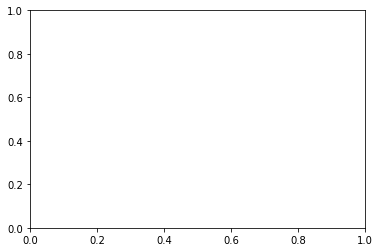

In [142]:
wRC_accumulation("Barry", "Bonds")

In [23]:
import time

if __name__ == '__main__':
    start = time.time()
    AllSabar()
    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
    
#AllSabarはすごく時間がかかるので、改善しよう

elapsed_time:2.4565770626068115[sec]


In [177]:
#改善策その1 BattingCopy.csvは作られている前提
def wRC(year, firstname, lastname):
    import pandas as pd
    df_batting = pd.read_csv("BattingCopy.csv")
    playerID = IDreturn_imp(firstname, lastname)
    df_Xplayer = df_batting[(df_batting["playerID"] == playerID) & (df_batting["yearID"] == year)]
    return float((float(df_Xplayer['wRAA']) + (float(df_Xplayer['AB']) + float(df_Xplayer['BB']) + float(df_Xplayer['HBP']) + float(df_Xplayer['SF']) + float(df_Xplayer['SH'])) * Sum_R(year) / Sum_PA(year)))

In [1]:
def wRC_accumulation(firstname, lastname):
    import pandas as pd
    width = 0.3
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    output = []
    df_batting = pd.read_csv("BattingCopy.csv")
    playerID = IDreturn_imp(firstname, lastname)
    df_Xplayer = df_batting[(df_batting["playerID"] == playerID)]
    df_Xplayer['WRC'] = df_Xplayer['wRAA'] + (df_Xplayer['AB'] + df_Xplayer['BB'] + df_Xplayer['HBP'] + df_Xplayer['SF'] + df_Xplayer['SH']) * Sum_R(int(df_Xplayer['yearID'])) / Sum_PA(int(df_Xplayer['yearID']))
    #Sum_Rを使えるようにmapかapply導入
    new_list = list(df_batting[df_batting["playerID"] == playerID].yearID)
    plt.bar(new_list, df_Xplayer['WRC'], width=width, label="%s" %(firstname + " " + lastname))
    plt.title("wRC of %s" %(firstname + " " + lastname))
    plt.show()

In [2]:
print(wRC_accumulation("Barry", "Bonds"))

NameError: name 'IDreturn_imp' is not defined

In [176]:
import time

if __name__ == '__main__':
    start = time.time()
    print(Sum_R(2001))
    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

23199
elapsed_time:0.025107145309448242[sec]


In [169]:
print(wRC_accumulation("Ichiro", "Suzuki"))

TypeError: cannot convert the series to <class 'float'>